In [1]:
import anndata
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import math
import pickle
import seaborn as sns
import scipy
import sys
import scanpy as sc
import pandas as pd

from scbasset.utils import *

### path to input data

In [2]:
trained_model = '../../data/downloads/pbmc_model.h5'
motif_fasta_folder = '../../data/downloads/Homo_sapiens_motif_fasta'
rna_data = '../../data/multiome_pbmc/ad_rna_annotate.h5ad'

### load the data and trained model

In [3]:
# read the cell annotations based on scRNA
ad = anndata.read_h5ad(rna_data)
sc.pp.normalize_total(ad, target_sum=1e6)
sc.pp.log1p(ad)

# load model
model = make_model(32, ad.shape[0], show_summary=False)
model.load_weights(trained_model)

2022-03-23 21:35:30.043752: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-23 21:35:30.043813: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gpu-2-snapshot): /proc/driver/nvidia/version does not exist
2022-03-23 21:35:30.045980: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### score a TF of interest

In [4]:
scores = motif_score('PAX5', model, motif_fasta_folder=motif_fasta_folder)
ad.obs['PAX5_activity'] = scores

2022-03-23 21:35:33.039624: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


### plot cell annotation (left), TF expression (mid) and TF activity (right)

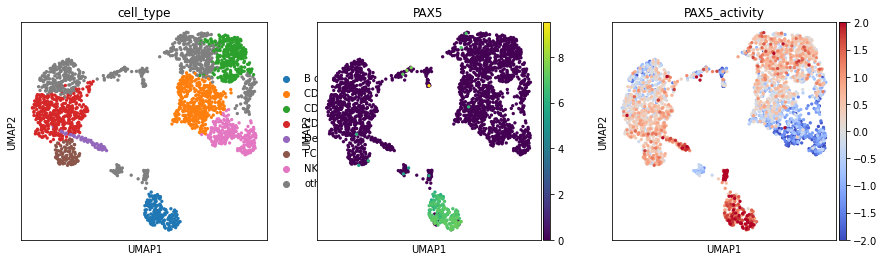

In [5]:
f, axs = plt.subplots(ncols=3, figsize=(15, 4))
sc.pl.umap(ad, color='cell_type', ax=axs[0], show=False)
sc.pl.umap(ad, color='PAX5', ax=axs[1], show=False)
sc.pl.umap(ad, color='PAX5_activity', ax=axs[2], cmap='coolwarm', vmin=-2, vmax=2)
f.tight_layout()